In [1]:
%load_ext autoreload
%autoreload 2
%cd "~/deepshape/deepshape"

/home/jorgen/deepshape/deepshape


In [2]:
import time
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8.3, 5.6)
plt.rcParams["font.size"] = 16
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16

In [3]:
from curves import *
from layers import *
from palais_layer import *
from visual import *
from networks import *

In [4]:
savepath = "/home/jorgen/masters-thesis-shape-analysis/chapter04/figures/deep/different-shape/"

error_opt = 2. - np.sqrt(2.)

g = Diffeomorphism(
    lambda x: x - torch.sin(2. * pi * x) / (2. * pi)
)

c1 = Curve((
    lambda x: torch.cos(pi * x) / np.cbrt(pi),
    lambda x: torch.sin(pi * x) / np.cbrt(pi)
))

c2 = Curve((
    lambda x: torch.zeros_like(x),
    lambda x: (3.*x + 1.)**(1./3.)
))

# Take Qmaps
q, r = Qmap(c1), Qmap(c2)

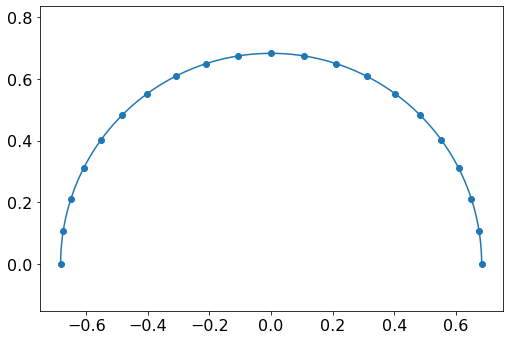

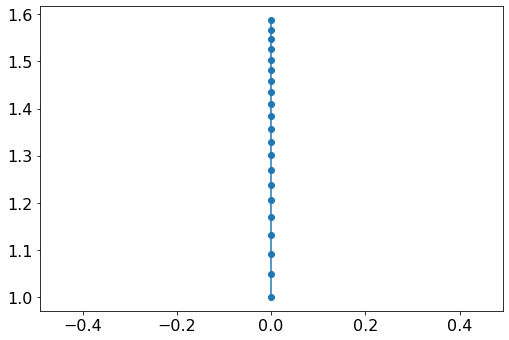

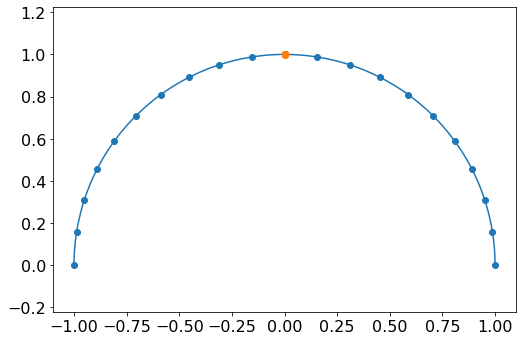

In [31]:
plt.figure(figsize=(8.3, 5.6))
plot_curve(c1, dotpoints=21, ax=plt.gca())
plt.axis("equal")
plt.savefig(savepath + "halfcircle.pdf", bbox_inches="tight")

plt.figure(figsize=(8.3, 5.6))
plot_curve(c2, dotpoints=21, ax=plt.gca())
plt.axis("equal")
plt.savefig(savepath + "line.pdf", bbox_inches="tight")

plt.figure(figsize=(8.3, 5.6))
plot_curve(q, dotpoints=21, ax=plt.gca())
plot_curve(r, dotpoints=21, ax=plt.gca())
plt.axis("equal")
plt.savefig(savepath + "qmaps.pdf", bbox_inches="tight")

[Iter     1] loss: 0.72805
[Iter     2] loss: 0.64028
[Iter     3] loss: 0.62811
[Iter     4] loss: 0.62157
[Iter     5] loss: 0.61690
[Iter     6] loss: 0.61343
[Iter     7] loss: 0.61071
[Iter     8] loss: 0.60854
[Iter     9] loss: 0.60659
[Iter    10] loss: 0.60496
[Iter    11] loss: 0.60379
[Iter    12] loss: 0.60278
[Iter    13] loss: 0.60058
[Iter    14] loss: 0.60008
[Iter    15] loss: 0.59838
[Iter    16] loss: 0.59811
[Iter    17] loss: 0.59753
[Iter    18] loss: 0.59711
[Iter    19] loss: 0.59552
[Iter    20] loss: 0.59486
[Iter    21] loss: 0.59248
[Iter    22] loss: 0.59196
[Iter    23] loss: 0.59147
[Iter    24] loss: 0.59098
[Iter    25] loss: 0.59056
[Iter    26] loss: 0.59021
[Iter    27] loss: 0.58991
[Iter    28] loss: 0.58900
[Iter    29] loss: 0.58890
[Iter    30] loss: 0.58887
[Iter    31] loss: 0.58874
[Iter    32] loss: 0.58860
[Iter    33] loss: 0.58847
[Iter    34] loss: 0.58833
[Iter    35] loss: 0.58820
[Iter    36] loss: 0.58774
[Iter    37] loss: 0.58770
[

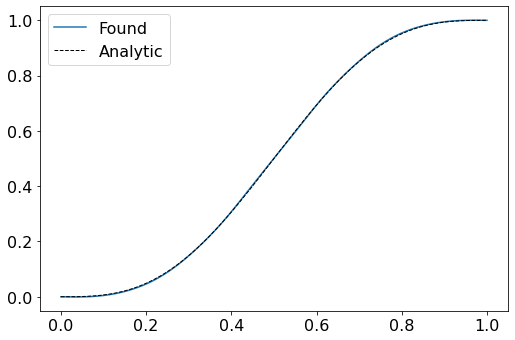

In [30]:
# Build network of L layers with N_l basis functions per layer
RN = ReparametrizationNetwork1D(5, 5, init_scale=0.)# , layer_type=PalaisLayer1D)

# Choose and configure optimizer.
optimizer = optim.LBFGS(RN.parameters(), lr=1e-1, max_iter=200, line_search_fn='strong_wolfe')
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=2, threshold=0.,
    threshold_mode='rel', cooldown=10, min_lr=1e-6, eps=1e-08,
    verbose=True)

# scheduler=None
error = train_bfgs(q, r, RN, optimizer, scheduler=scheduler, iterations=1, log_every=1)

# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 1024).unsqueeze(-1)
z, y = RN(x)
z, y = z.detach(), y.detach()
Q, R = q(x), RN.reparametrized(r, x)
R = R.detach()

# Plot Diffeomorphism...
plt.figure(figsize=(8.4, 5.6))
plt.plot(x, z, label="Found", lw=1.5)
plt.plot(x, g(x), label="Analytic", ls="--", c="black", lw=1)


# plt.title("Comparison of True vs. Found Reparametrization")
plt.legend()
plt.savefig(savepath + "reparmetrized_diffeomorhpisms.pdf", bbox_inches="tight")
plt.show()

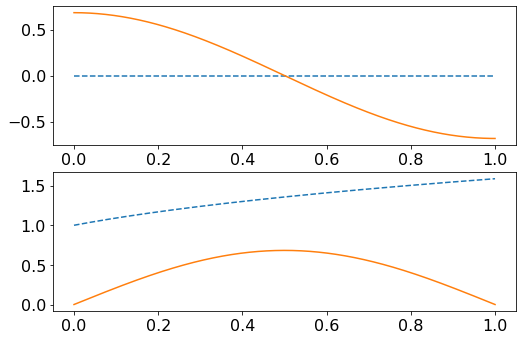

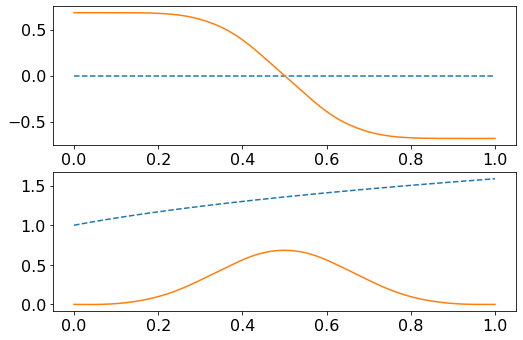

In [7]:
# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 1024).unsqueeze(-1)
C1, C2, C3 = c1(x), c2(x), c1(z)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.3, 5.6))
ax1.plot(x, C2[:, 0], ls="dashed")
ax1.plot(x, C1[:, 0])

ax2.plot(x, C2[:, 1], ls="dashed")
ax2.plot(x, C1[:, 1])

plt.savefig(savepath + "coordinates-before.pdf", bbox_inches="tight")
plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.3, 5.6))
ax1.plot(x, C2[:, 0], ls="dashed")
ax1.plot(x, C3[:, 0])

ax2.plot(x, C2[:, 1], ls="dashed")
ax2.plot(x, C3[:, 1])

plt.savefig(savepath + "coordinates-after.pdf", bbox_inches="tight")
plt.show()

In [ ]:
print("Errors, 1-norm, 2-norm and inf-norm")
print((g(x) - z).norm(1)/ 1024.)
print((g(x) - z).norm(2)/ np.sqrt(1024))
print((g(x) - z).norm(float(np.inf)))

In [40]:
(error - error_opt)[0]

0.14226659572499334

In [41]:
(error - error_opt)[-1]

0.0006359461583429482

In [42]:
(error - error_opt)[-1]/ (error - error_opt)[0]

0.004470101748777738

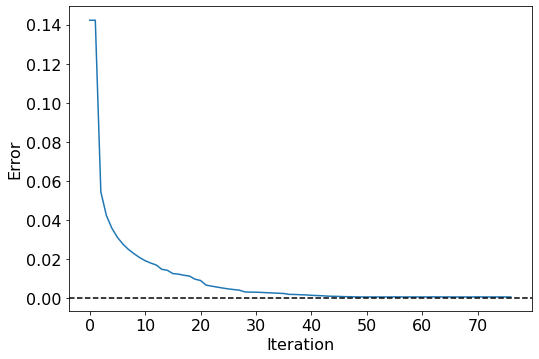

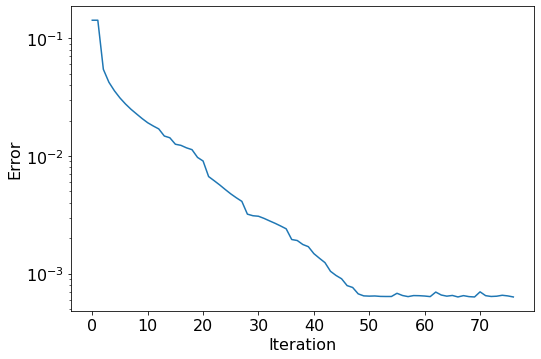

In [34]:
plt.figure()
# plt.plot(error)
# plt.axhline(2. - np.sqrt(2), ls="--", c="black")
plt.plot(error - 2 + np.sqrt(2.))
plt.axhline(0., ls="--", c="black")

plt.ylabel("Error", fontsize=16)
plt.xlabel("Iteration", fontsize=16)
plt.savefig(savepath + "reparametrization_error_lin.pdf", bbox_inches="tight")

plt.figure()
# plt.semilogy(error)
# plt.axhline(2. - np.sqrt(2), ls="--", c="black")
plt.semilogy(error - 2 + np.sqrt(2.))
plt.axhline(0., ls="--", c="black")
plt.ylabel("Error", fontsize=16)
plt.xlabel("Iteration", fontsize=16)

plt.savefig(savepath + "reparametrization_error_log.pdf", bbox_inches="tight")

plt.show()

In [5]:
error_vs_num_layers = []
bfgs_iter=200
for l in range(1, 11):
    # Build network of L layers with N_l basis functions per layer
    RN = ReparametrizationNetwork1D(l, 5, init_scale=0.)#, layer_type=PalaisLayer1D)
    
    optimizer = optim.LBFGS(RN.parameters(), lr=0.9, max_iter=bfgs_iter, max_eval=bfgs_iter, line_search_fn="strong_wolfe")
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=1, threshold=0.,
                                                 threshold_mode='rel', cooldown=10, min_lr=1e-3, eps=1e-08, verbose=True)
    
    error = train_bfgs(q, r, RN, optimizer, scheduler=scheduler, iterations=1, log_every=1.)
    print(error[-1])
    error_vs_num_layers.append(error[-1])
    

[Iter     1] loss: 0.72805
[Iter     2] loss: 0.61832
[Iter     3] loss: 0.59092
[Iter     4] loss: 0.61115
Epoch     5: reducing learning rate of group 0 to 4.5000e-01.
[Iter     5] loss: 0.59289
[Iter     6] loss: 0.58871
[Iter     7] loss: 0.58753
[Iter     8] loss: 0.59125
[Iter     9] loss: 0.58729
[Iter    10] loss: 0.58719
[Iter    11] loss: 0.59070
[Iter    12] loss: 0.58769
[Iter    13] loss: 0.58724
[Iter    14] loss: 0.58721
[Iter    15] loss: 0.58720
[Iter    16] loss: 0.58719
[Iter    17] loss: 0.58720
Epoch    18: reducing learning rate of group 0 to 2.2500e-01.
[Iter    18] loss: 0.58720
[Iter    19] loss: 0.58720
[Iter    20] loss: 0.58720
[Iter    21] loss: 0.58719
[Iter    22] loss: 0.58719
[Iter    23] loss: 0.58719
[Iter    24] loss: 0.58719
[Iter    25] loss: 0.59069
[Iter    26] loss: 0.58769
[Iter    27] loss: 0.58724
[Iter    28] loss: 0.58720
[Iter    29] loss: 0.58719
Epoch    30: reducing learning rate of group 0 to 1.1250e-01.
[Iter    30] loss: 0.58720
[Ite

[Iter    33] loss: 0.58674
[Iter    34] loss: 0.58796
[Iter    35] loss: 0.58686
[Iter    36] loss: 0.58677
Epoch    37: reducing learning rate of group 0 to 2.2500e-01.
[Iter    37] loss: 0.58675
[Iter    38] loss: 0.58675
[Iter    39] loss: 0.58675
[Iter    40] loss: 0.58674
[Iter    41] loss: 0.58674

Finished training in 0.22175s
0.5867358446121216
[Iter     1] loss: 0.72805
[Iter     2] loss: 1.11170
[Iter     3] loss: 0.60976
[Iter     4] loss: 0.60750
[Iter     5] loss: 0.59923
[Iter     6] loss: 0.59843
[Iter     7] loss: 0.59705
[Iter     8] loss: 0.59395
[Iter     9] loss: 0.59168
[Iter    10] loss: 0.60745
[Iter    11] loss: 0.59153
[Iter    12] loss: 0.59077
[Iter    13] loss: 0.59040
[Iter    14] loss: 0.59028
[Iter    15] loss: 0.59000
[Iter    16] loss: 0.58944
[Iter    17] loss: 0.58906
[Iter    18] loss: 0.58867
[Iter    19] loss: 0.58847
[Iter    20] loss: 0.58825
[Iter    21] loss: 0.58821
[Iter    22] loss: 0.59102
Epoch    23: reducing learning rate of group 0 to 4

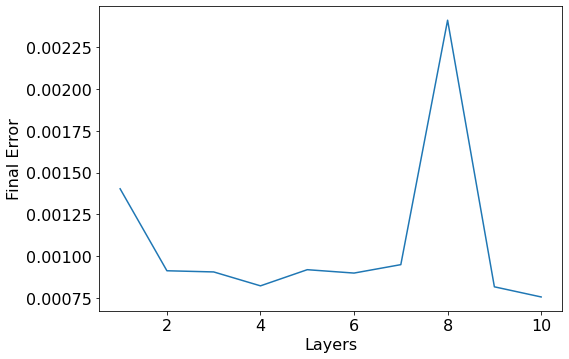

In [6]:
plt.figure(figsize=(8.3, 5.6))
plt.plot(range(1, 11), error_vs_num_layers - error_opt)
plt.ylabel("Final Error", fontsize=16)
plt.xlabel("Layers", fontsize=16)
plt.savefig(savepath + "error-vs-layers-fourier.pdf", bbox_inches="tight")
plt.show()

In [7]:
errors_vs_num_basis = []
for l in range(1, 11):
    # Build network of L layers with N_l basis functions per layer
    RN = ReparametrizationNetwork1D(5, l, init_scale=0.)#, layer_type=PalaisLayer1D)
    
    optimizer = optim.LBFGS(RN.parameters(), lr=0.9, max_iter=200, line_search_fn="strong_wolfe")
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=1, threshold=0.,
        threshold_mode='rel', cooldown=10, min_lr=1e-6, eps=1e-08,
        verbose=True)
    
    error = train_bfgs(q, r, RN, optimizer, scheduler=scheduler, iterations=1, log_every=1.)
    print(error[-1])
    errors_vs_num_basis.append(error[-1])
    

[Iter     1] loss: 0.72805
[Iter     2] loss: 0.72805
[Iter     3] loss: 0.72806
Epoch     4: reducing learning rate of group 0 to 4.5000e-01.
[Iter     4] loss: 0.72806
[Iter     5] loss: 0.72805
[Iter     6] loss: 0.72805
[Iter     7] loss: 0.72805
[Iter     8] loss: 0.72807
[Iter     9] loss: 0.72805
[Iter    10] loss: 0.72806
[Iter    11] loss: 0.72805
[Iter    12] loss: 0.72807
[Iter    13] loss: 0.72806
[Iter    14] loss: 0.72805
[Iter    15] loss: 0.72805

Finished training in 0.05418s
0.728051483631134
[Iter     1] loss: 0.72805
[Iter     2] loss: 1.49050
Epoch     3: reducing learning rate of group 0 to 4.5000e-01.
[Iter     3] loss: 0.76648
[Iter     4] loss: 0.61600
[Iter     5] loss: 0.61599
[Iter     6] loss: 0.61598
[Iter     7] loss: 0.61595
[Iter     8] loss: 0.63210
[Iter     9] loss: 0.61583
[Iter    10] loss: 0.61570
[Iter    11] loss: 0.61459
[Iter    12] loss: 0.60950
[Iter    13] loss: 0.60778
[Iter    14] loss: 0.61760
[Iter    15] loss: 0.60535
[Iter    16] loss

[Iter    31] loss: 0.96046
[Iter    32] loss: 0.91495
[Iter    33] loss: 0.84677
[Iter    34] loss: 0.75792
[Iter    35] loss: 0.64917
[Iter    36] loss: 0.58633
[Iter    37] loss: 0.58633
Epoch    38: reducing learning rate of group 0 to 2.2500e-01.
[Iter    38] loss: 0.58633
[Iter    39] loss: 0.58633
[Iter    40] loss: 0.58631
[Iter    41] loss: 0.58632
[Iter    42] loss: 0.58631

Finished training in 0.19113s
0.586310088634491
[Iter     1] loss: 0.72805
[Iter     2] loss: 0.68695
[Iter     3] loss: 0.68693
[Iter     4] loss: 0.63068
[Iter     5] loss: 0.61648
[Iter     6] loss: 0.58893
[Iter     7] loss: 0.58818
[Iter     8] loss: 0.58778
[Iter     9] loss: 0.58757
[Iter    10] loss: 0.58729
[Iter    11] loss: 0.58711
[Iter    12] loss: 0.58706
[Iter    13] loss: 0.58689
[Iter    14] loss: 0.58678
[Iter    15] loss: 0.58660
[Iter    16] loss: 0.58651
[Iter    17] loss: 0.58644
[Iter    18] loss: 0.58640
[Iter    19] loss: 0.58640
[Iter    20] loss: 0.58636
[Iter    21] loss: 0.5863

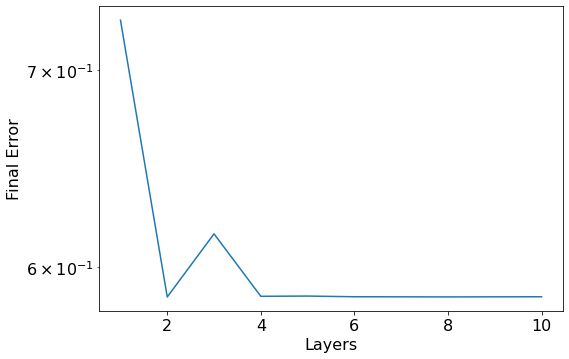

In [8]:
plt.figure(figsize=(8.3, 5.6))
plt.semilogy(range(1, 11), errors_vs_num_basis)
plt.ylabel("Final Error", fontsize=16)
plt.xlabel("Layers", fontsize=16)
plt.savefig(savepath + "error-vs-functions-fourier.pdf", bbox_inches="tight")
plt.show()

In [9]:
palais_errorsvs_num_layers = []
for l in range(1, 11):
    # Build network of L layers with N_l basis functions per layer
    RN = ReparametrizationNetwork1D(l, 5, init_scale=0., layer_type=PalaisLayer1D)
    
    optimizer = optim.LBFGS(RN.parameters(), lr=0.9, max_iter=200, line_search_fn="strong_wolfe")
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=1, threshold=0.,
        threshold_mode='rel', cooldown=10, min_lr=1e-6, eps=1e-08,
        verbose=True)
    
    error = train_bfgs(q, r, RN, optimizer, scheduler=scheduler, iterations=1, log_every=1.)
    print(error[-1])
    palais_errorsvs_num_layers.append(error[-1])
    

[Iter     1] loss: 0.72805
[Iter     2] loss: 0.59100
[Iter     3] loss: 0.58905
[Iter     4] loss: 0.58903
[Iter     5] loss: 0.58903
[Iter     6] loss: 0.58902
[Iter     7] loss: 0.58903
Epoch     8: reducing learning rate of group 0 to 4.5000e-01.
[Iter     8] loss: 0.58902
[Iter     9] loss: 0.58902
[Iter    10] loss: 0.58902
[Iter    11] loss: 0.59681
[Iter    12] loss: 0.59274
[Iter    13] loss: 0.58952
[Iter    14] loss: 0.58879
[Iter    15] loss: 0.59138
[Iter    16] loss: 0.58909
[Iter    17] loss: 0.58872
[Iter    18] loss: 0.58877
[Iter    19] loss: 0.58872
Epoch    20: reducing learning rate of group 0 to 2.2500e-01.
[Iter    20] loss: 0.58872
[Iter    21] loss: 0.58871
[Iter    22] loss: 0.58872
[Iter    23] loss: 0.58871
[Iter    24] loss: 0.58871
[Iter    25] loss: 0.58871
[Iter    26] loss: 0.58871
[Iter    27] loss: 0.58871
[Iter    28] loss: 0.59462
[Iter    29] loss: 0.59254
[Iter    30] loss: 0.58984
[Iter    31] loss: 0.58888
Epoch    32: reducing learning rate of 

[Iter    35] loss: 0.58649
[Iter    36] loss: 0.58649
[Iter    37] loss: 0.58649
[Iter    38] loss: 0.58649
[Iter    39] loss: 0.58649
Epoch    40: reducing learning rate of group 0 to 2.2500e-01.
[Iter    40] loss: 0.59432
[Iter    41] loss: 0.58649
[Iter    42] loss: 0.58650
[Iter    43] loss: 0.58649
[Iter    44] loss: 0.58650
[Iter    45] loss: 0.58650
[Iter    46] loss: 0.58649
[Iter    47] loss: 0.58649

Finished training in 0.24959s
0.586486279964447
[Iter     1] loss: 0.72805
[Iter     2] loss: 0.75752
[Iter     3] loss: 0.60592
[Iter     4] loss: 0.59994
[Iter     5] loss: 0.59893
[Iter     6] loss: 0.59812
[Iter     7] loss: 0.59593
[Iter     8] loss: 0.59334
[Iter     9] loss: 0.62049
[Iter    10] loss: 0.59282
[Iter    11] loss: 0.59135
[Iter    12] loss: 0.59063
[Iter    13] loss: 0.59058
[Iter    14] loss: 0.59054
[Iter    15] loss: 0.59042
[Iter    16] loss: 0.59018
[Iter    17] loss: 0.58995
[Iter    18] loss: 0.58954
[Iter    19] loss: 0.58922
[Iter    20] loss: 0.5889

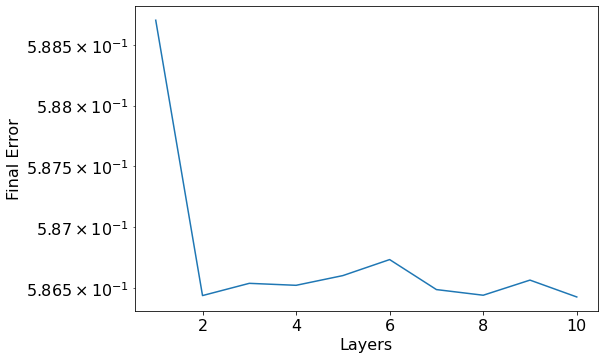

In [10]:
plt.figure(figsize=(8.3, 5.6))
plt.semilogy(range(1, 11), palais_errorsvs_num_layers)
plt.ylabel("Final Error", fontsize=16)
plt.xlabel("Layers", fontsize=16)
plt.savefig(savepath + "error-vs-layers-palais.pdf", bbox_inches="tight")
plt.show()

In [11]:
palais_errorsvs_num_basis = []
for l in range(1, 11):
    # Build network of L layers with N_l basis functions per layer
    RN = ReparametrizationNetwork1D(5, l, init_scale=0., layer_type=PalaisLayer1D)
    
    optimizer = optim.LBFGS(RN.parameters(), lr=0.9, max_iter=200, line_search_fn="strong_wolfe")
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=1, threshold=0.,
        threshold_mode='rel', cooldown=10, min_lr=1e-6, eps=1e-08,
        verbose=True)
    
    error = train_bfgs(q, r, RN, optimizer, scheduler=scheduler, iterations=1, log_every=1.)
    print(error[-1])
    palais_errorsvs_num_basis.append(error[-1])
    

[Iter     1] loss: 0.72805
[Iter     2] loss: 0.72805
[Iter     3] loss: 0.72806
Epoch     4: reducing learning rate of group 0 to 4.5000e-01.
[Iter     4] loss: 0.72806
[Iter     5] loss: 0.72805
[Iter     6] loss: 0.72805
[Iter     7] loss: 0.72805
[Iter     8] loss: 0.72807
[Iter     9] loss: 0.72805
[Iter    10] loss: 0.72806
[Iter    11] loss: 0.72805
[Iter    12] loss: 0.72807
[Iter    13] loss: 0.72806
[Iter    14] loss: 0.72805
[Iter    15] loss: 0.72805

Finished training in 0.05523s
0.728051483631134
[Iter     1] loss: 0.72805
[Iter     2] loss: 0.88286
[Iter     3] loss: 0.61608
[Iter     4] loss: 0.61599
[Iter     5] loss: 0.61599
[Iter     6] loss: 0.61599
[Iter     7] loss: 0.61600
Epoch     8: reducing learning rate of group 0 to 4.5000e-01.
[Iter     8] loss: 0.61599
[Iter     9] loss: 0.61599
[Iter    10] loss: 0.61599
[Iter    11] loss: 0.61599
[Iter    12] loss: 0.61598
[Iter    13] loss: 0.61597
[Iter    14] loss: 0.61592
[Iter    15] loss: 0.67095
[Iter    16] loss

[Iter     4] loss: 0.59354
[Iter     5] loss: 0.59199
[Iter     6] loss: 0.59124
[Iter     7] loss: 0.58948
[Iter     8] loss: 0.58978
[Iter     9] loss: 0.58899
[Iter    10] loss: 0.58837
[Iter    11] loss: 0.58824
[Iter    12] loss: 0.58814
[Iter    13] loss: 0.58801
[Iter    14] loss: 0.58764
[Iter    15] loss: 0.58722
[Iter    16] loss: 0.58688
[Iter    17] loss: 0.58653
[Iter    18] loss: 0.58648
[Iter    19] loss: 0.58643
[Iter    20] loss: 0.58640
[Iter    21] loss: 0.58636
[Iter    22] loss: 0.58637
[Iter    23] loss: 0.58635
[Iter    24] loss: 0.58636
Epoch    25: reducing learning rate of group 0 to 4.5000e-01.
[Iter    25] loss: 0.58637
[Iter    26] loss: 0.58635
[Iter    27] loss: 0.58636
[Iter    28] loss: 0.58635
[Iter    29] loss: 0.58635
[Iter    30] loss: 0.58634
[Iter    31] loss: 0.58635
[Iter    32] loss: 0.58634
[Iter    33] loss: 0.59719
[Iter    34] loss: 0.58638
[Iter    35] loss: 0.58635
[Iter    36] loss: 0.58635
Epoch    37: reducing learning rate of group 0 

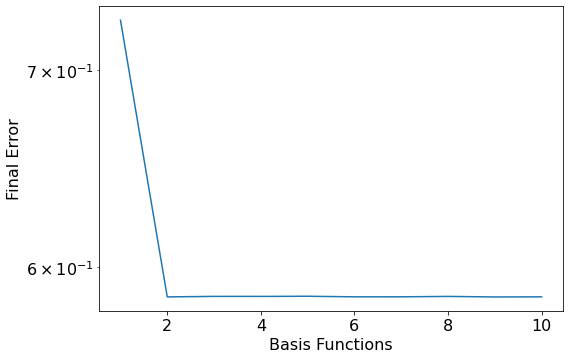

In [12]:
plt.figure(figsize=(8.3, 5.6))
plt.semilogy(range(1, 11), palais_errorsvs_num_basis)
plt.ylabel("Final Error", fontsize=16)
plt.xlabel("Basis Functions", fontsize=16)
plt.savefig(savepath + "error-vs-functions-palais.pdf", bbox_inches="tight")
plt.show()

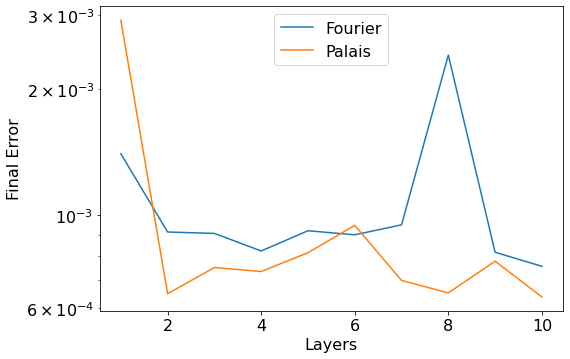

In [13]:
plt.figure(figsize=(8.3, 5.6))
plt.semilogy(range(1, 11), error_vs_num_layers - error_opt, label="Fourier")
plt.semilogy(range(1, 11), palais_errorsvs_num_layers - error_opt, label="Palais")
plt.ylabel("Final Error", fontsize=16)
plt.xlabel("Layers", fontsize=16)
plt.legend(fontsize=16)
plt.savefig(savepath + "error-vs-layers-both.pdf", bbox_inches="tight")
plt.show()

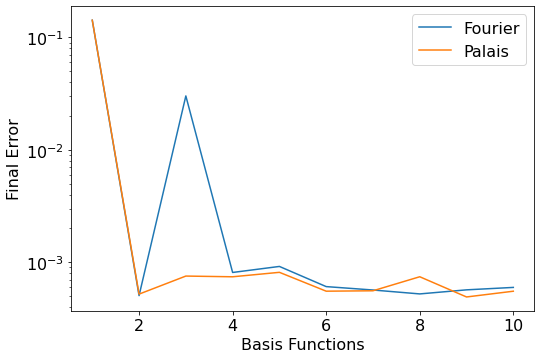

In [14]:
plt.figure(figsize=(8.3, 5.6))
plt.semilogy(range(1, 11), errors_vs_num_basis - error_opt, label="Fourier")
plt.semilogy(range(1, 11), palais_errorsvs_num_basis - error_opt, label="Palais")
plt.ylabel("Final Error", fontsize=16)
plt.xlabel("Basis Functions", fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(savepath + "error-vs-basis-both.pdf", bbox_inches="tight")
plt.show()